# Missing Value Imputation by Mean, Median & Mode <br/>

# Problem : 
An Icecream company wants to analyze the sales data for Strawberry Icecream & Chocolate Icecream. However there are certain missing values in the Prodict Line as well as in Sales and ItemsSold. Here we have used Mean and Median to fill the Na Values for numeric data (ItemsSold & Sales) and applied Mode function to fill the missing value for Product Line. <br/> 

I have divided the data into two section 
Main Data (df)
1. df1 (Numeric Data)      : OrderID, Itemssold, Sales
2. df2 (Categorical Data)  : ProductLine , Country <br/>

Now  I have created few Senarios and applied Mean, Median functionality on df1 and Mode as well on df2.


In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Feature Eng'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\EDA

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\EDA


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load the dataset
df = pd.read_csv("Icecream_Sales.csv")

In [5]:
df.shape

(59, 5)

In [6]:
df.head()

,ORDERNUMBER,PRODUCTLINE,Country,ITEMSSOLD,SALES
0,10381,Strawberry Icecream,Belgium,30.0,8254.80
1,10391,Strawberry Icecream,Belgium,34.0,4140.23
2,10411,NaN,Belgium,41.0,12001.00
3,10424,NaN,Belgium,NaN,19861.77
4,10107,NaN,Belgium,49.0,27722.54


In [7]:
#Lets check the data types
df.dtypes

ORDERNUMBER      int64
PRODUCTLINE     object
Country         object
ITEMSSOLD      float64
SALES          float64
dtype: object

In [8]:
#to check the total amount of null value (0 = no null rest will represent the no of null value present.)
df.isnull().sum()

ORDERNUMBER     0
PRODUCTLINE    18
Country        26
ITEMSSOLD      14
SALES          11
dtype: int64

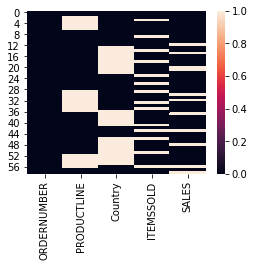

In [9]:
#THROUGH HEATMAP WE WILL VERIFY THE NULL VALUE : white represent null value and black represent : value present.
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull())

In [10]:
#Assigning an oject which has only the numerical value 
df1 = df.select_dtypes(include=['int64','float64'])
df2 = df.select_dtypes(include=['object'])

# Mean & Median

In [11]:
#Checking individual data frame respectively
#df1 : Numerical Value
df1.head(10)

,ORDERNUMBER,ITEMSSOLD,SALES
0,10381,30.0,8254.80
1,10391,34.0,4140.23
2,10411,41.0,12001.00
3,10424,NaN,19861.77
4,10107,49.0,27722.54
5,10120,36.0,2793.86
6,10134,29.0,3307.77
7,10145,48.0,5192.95
8,10159,34.0,5016.83
9,10168,NaN,3660.93


In [12]:
#df2 : Categorical Value
df2.head()

,PRODUCTLINE,Country
0,Strawberry Icecream,Belgium
1,Strawberry Icecream,Belgium
2,NaN,Belgium
3,NaN,Belgium
4,NaN,Belgium


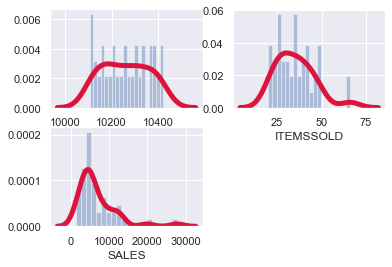

In [13]:
#visualize each columns
sns.set()
for i, var in enumerate (df1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# SENARIO 1 
If we want to individually calculate the attribute using mean / median seperately on each featues we can follow this steps. 

In [14]:
# Mean 
df3_Mean = df1['SALES'].fillna(df1['SALES'].mean())
df3_Mean.head()

0     8254.80
1     4140.23
2    12001.00
3    19861.77
4    27722.54
Name: SALES, dtype: float64

In [15]:
# Median
df4_Median = df1['ITEMSSOLD'].fillna(df1['ITEMSSOLD'].median())
df4_Median.head()

0    30.0
1    34.0
2    41.0
3    34.0
4    49.0
Name: ITEMSSOLD, dtype: float64

# SENARIO 2 
Applying seperately Mean , Median on the entire data set and filling the NA value

# Median

In [16]:
# Calculating Median
df5_median = df1.fillna(df1.median())


In [17]:
df5_median.head()

,ORDERNUMBER,ITEMSSOLD,SALES
0,10381,30.0,8254.80
1,10391,34.0,4140.23
2,10411,41.0,12001.00
3,10424,34.0,19861.77
4,10107,49.0,27722.54


In [18]:
df5_median.isnull().sum()

ORDERNUMBER    0
ITEMSSOLD      0
SALES          0
dtype: int64

# MEAN

In [19]:
# Calculating Mean
df6_mean = df1.fillna(df1.mean())

In [20]:
df6_mean.head()

,ORDERNUMBER,ITEMSSOLD,SALES
0,10381,30.000000,8254.80
1,10391,34.000000,4140.23
2,10411,41.000000,12001.00
3,10424,35.133333,19861.77
4,10107,49.000000,27722.54


In [21]:
df6_mean.isnull().sum()

ORDERNUMBER    0
ITEMSSOLD      0
SALES          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earl

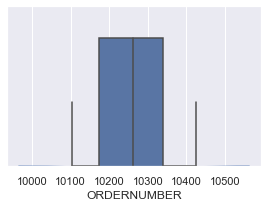

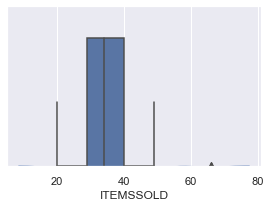

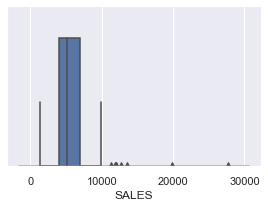

In [35]:
for i,var in enumerate(df1):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,2,1)
    sns.boxplot(df5_median[var])
    plt.subplot(3,2,1)
    sns.distplot(df6_mean[var])

# Mode
We have applied Mode on Categorical Data

In [23]:
df2.head()

,PRODUCTLINE,Country
0,Strawberry Icecream,Belgium
1,Strawberry Icecream,Belgium
2,NaN,Belgium
3,NaN,Belgium
4,NaN,Belgium


In [24]:
#Lets check the variables where value is missing
isnull_per = df2.isnull().mean()*100
miss_vars=isnull_per[isnull_per>0].keys()
miss_vars

Index(['PRODUCTLINE', 'Country'], dtype='object')

# Senario - 1

If we want to fill the missing value only for 1 particular column

In [25]:
#fill the value only for Product Line by using Mode : no of highest occurance of data only
df2['PRODUCTLINE'].value_counts()

Chocolate Icecream     31
Strawberry Icecream    10
Name: PRODUCTLINE, dtype: int64

In [26]:
#Applying Mode fuction only on Product Line
df7_Mode_ProductLine = df2['PRODUCTLINE'].fillna(df2['PRODUCTLINE'].mode()[0])

In [27]:
df7_Mode_ProductLine.head()

0    Strawberry Icecream
1    Strawberry Icecream
2     Chocolate Icecream
3     Chocolate Icecream
4     Chocolate Icecream
Name: PRODUCTLINE, dtype: object

# Senario - 2

If we want to fill the missing value only for more than column

In [28]:
for i in miss_vars:
    df2[i].fillna(df2[i].mode()[0], inplace=True)
    print(i,"=",df[i].mode()[0])

PRODUCTLINE = Chocolate Icecream
Country = Belgium


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
df2.isnull().sum()

PRODUCTLINE    0
Country        0
dtype: int64

In [30]:
df2

,PRODUCTLINE,Country
0,Strawberry Icecream,Belgium
1,Strawberry Icecream,Belgium
2,Chocolate Icecream,Belgium
3,Chocolate Icecream,Belgium
4,Chocolate Icecream,Belgium
5,Chocolate Icecream,Belgium
6,Chocolate Icecream,Belgium
7,Chocolate Icecream,Belgium
8,Chocolate Icecream,Belgium
9,Chocolate Icecream,Belgium
